In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
"""
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
"""

"\n Variables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n"

In [2]:
for i in range(data.shape[1]):
    print("Feature",i+1,":",np.count_nonzero(data[:,i]))

Feature 1 : 506
Feature 2 : 134
Feature 3 : 506
Feature 4 : 35
Feature 5 : 506
Feature 6 : 506
Feature 7 : 506
Feature 8 : 506
Feature 9 : 506
Feature 10 : 506
Feature 11 : 506
Feature 12 : 506
Feature 13 : 506


In [3]:
final_data = np.column_stack((data,target))
print(final_data.shape)

(506, 14)


In [4]:
import seaborn as sns
sns.set_style("white")

<Axes: >

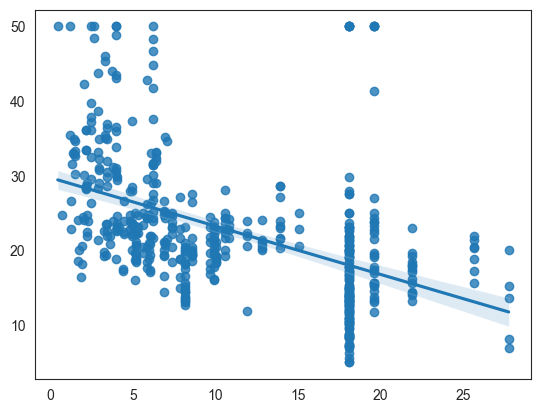

In [8]:
sns.regplot(x=data[:,2],y=target)

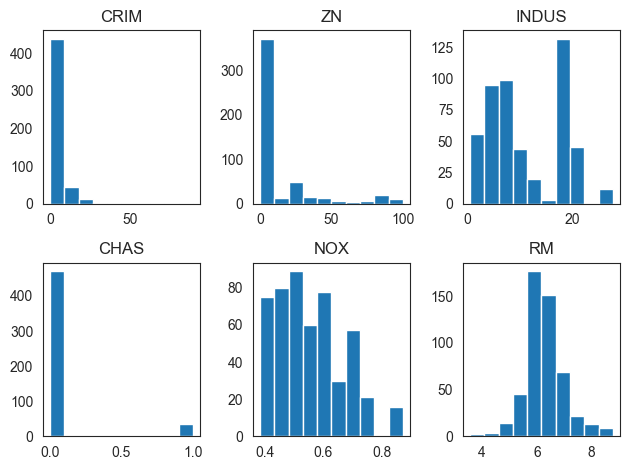

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3)

axes[0, 0].hist(data[:,0])
axes[0, 1].hist(data[:,1])
axes[0, 2].hist(data[:,2])
axes[1, 0].hist(data[:,3])
axes[1, 1].hist(data[:,4])
axes[1, 2].hist(data[:,5])


# 添加标签和标题
axes[0, 0].set_title('CRIM')
axes[0, 1].set_title('ZN')
axes[0, 2].set_title('INDUS')
axes[1, 0].set_title('CHAS')
axes[1, 1].set_title('NOX')
axes[1, 2].set_title('RM')

# 调整子图之间的距离
fig.tight_layout()

plt.show()

# 可以看到，每个特征的数据分布均不属于正态分布，同时，每个特征之间的取值范围存在差异，需要对数据进行归一化操作，使得特征范围一直，且服从正态分布，便于进行模型训练。

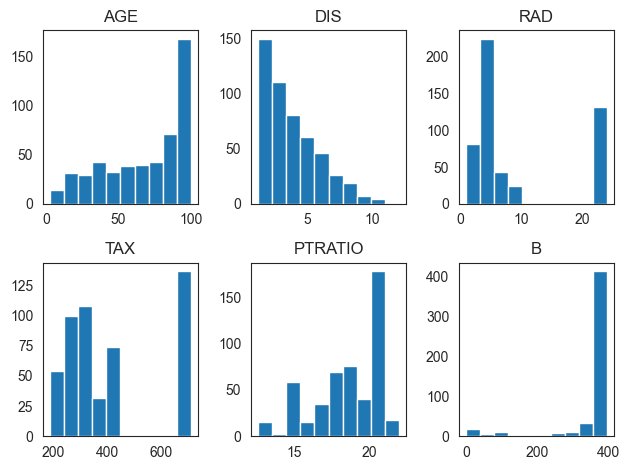

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3)

axes[0, 0].hist(data[:,6])
axes[0, 1].hist(data[:,7])
axes[0, 2].hist(data[:,8])
axes[1, 0].hist(data[:,9])
axes[1, 1].hist(data[:,10])
axes[1, 2].hist(data[:,11])


# 添加标签和标题
axes[0, 0].set_title('AGE')
axes[0, 1].set_title('DIS')
axes[0, 2].set_title('RAD')
axes[1, 0].set_title('TAX')
axes[1, 1].set_title('PTRATIO')
axes[1, 2].set_title('B')

# 调整子图之间的距离
fig.tight_layout()


plt.show()

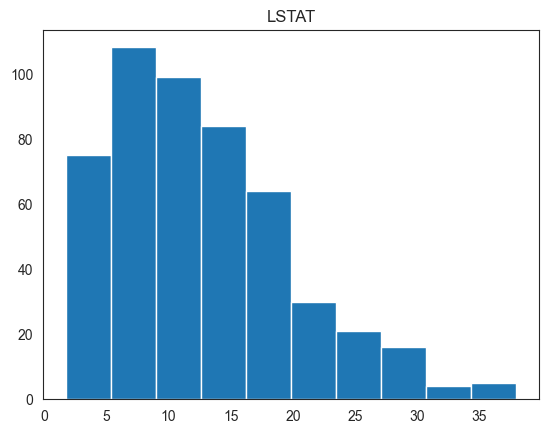

In [11]:
plt.hist(data[:,12])
plt.title("LSTAT")

plt.show()

<Axes: >

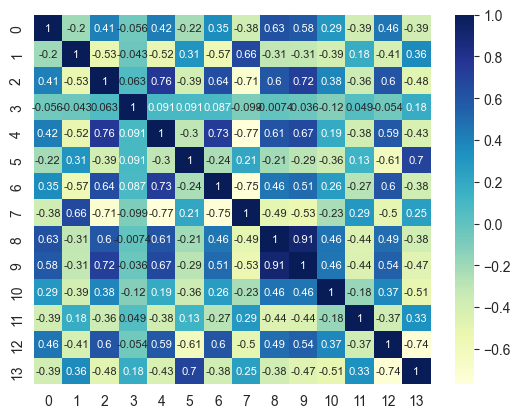

In [12]:
# 相关系数的可视化
sns.heatmap(np.corrcoef(final_data.T),cmap="YlGnBu",annot=True,annot_kws={"fontsize": 8})

In [14]:
corr_mat = np.corrcoef(final_data.T)

In [15]:
def HighlyCorr(corr_mat,thresh=0.5):
    idx_set = set()
    for i in range(corr_mat.shape[0]-1):
        for j in range(i+1,corr_mat.shape[1]-1):
            if abs(corr_mat[i,j]) > thresh:
                idx_set.add(i)
                idx_set.add(j)
                # print(f"feature {i+1} and feature {j+1} are highly correlated, {corr_mat[i,j]} ")
    return list(idx_set)
l = HighlyCorr(corr_mat)
print(l)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 12]


In [16]:
# # 由于feature4 含0较多，与其他特征的关系不大，与最后预测结果的相关性也不大 剔除feature4 
# 要排除的列的索引
exclude_cols = [3]
# 使用布尔索引选择要包含的列
include_cols = np.array([i for i in range(data.shape[1]) if i not in exclude_cols])
new_data = data[:, include_cols]
print(new_data.shape)

(506, 12)


In [18]:
# 特征归一化
X = MinMaxScaler().fit_transform(data)
# 特征组合
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)
# 输出X_poly的形状
print(X_poly.shape)

(506, 104)


In [19]:
# 保留彼此之间相关性大于0.6的特征
feature_idxs =  HighlyCorr(np.corrcoef(X_poly.T),0.6)
print(feature_idxs,len(feature_idxs))
# 特征筛选
include_cols = np.array([i for i in range(X_poly.shape[1]) if i  in feature_idxs])
features = X_poly[:, include_cols]
features.shape

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102] 101


(506, 101)

[5.48446434e-01 1.08859621e-01 7.91266953e-02 6.71927365e-02
 4.40674422e-02 3.21557503e-02 2.64350808e-02 2.30889716e-02
 1.33806548e-02 1.02123167e-02 7.77575183e-03 7.51454389e-03
 6.92572103e-03 3.85068529e-03 2.53264301e-03 2.15699679e-03
 1.62163014e-03 1.46381655e-03 1.44939832e-03 1.13769865e-03
 1.05937949e-03 9.07340757e-04 8.49399108e-04 7.90621500e-04
 6.22182310e-04 5.94869088e-04 5.05916425e-04 4.89606946e-04
 3.98942213e-04 3.63942125e-04 3.37059589e-04 2.64364206e-04
 2.48821476e-04 2.24614997e-04 2.03709332e-04 2.00957368e-04
 1.80044108e-04 1.69933545e-04 1.61693373e-04 1.48512763e-04
 1.39161976e-04 1.25406573e-04 1.16674443e-04 1.03701122e-04
 9.61190200e-05 8.74253704e-05 8.38352999e-05 8.33578930e-05
 7.38033330e-05 7.17905881e-05 6.51520062e-05 6.32185520e-05
 5.87151726e-05 5.74670842e-05 4.95422016e-05 4.52185097e-05
 4.30956720e-05 4.12102882e-05 3.75895937e-05 3.57229124e-05
 3.38362829e-05 3.26530562e-05 3.09754492e-05 2.97124993e-05
 2.39609469e-05 2.245446

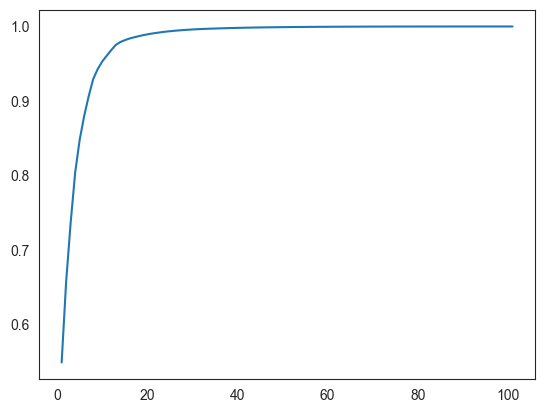

In [20]:
#PCA降维处理,防止特征过多使得模型出现过拟合问题。
from sklearn.decomposition import PCA

pca = PCA(n_components=101)
new_features = pca.fit_transform(features)
print(pca.explained_variance_ratio_) # 查看每个特征对方差的解释量大小，对特征数进行确定

# 作图
plt.plot(range(1,102),np.cumsum(pca.explained_variance_ratio_))
          
pca = PCA(n_components=20)
new_features = pca.fit_transform(features)